In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import pathlib
import os

In [ ]:
# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('GPU is available')
else:
    print('No GPU detected')

num_gpus = len(physical_devices)

if num_gpus > 0:
    print(f"Number of available GPUs: {num_gpus}")
    for i in range(num_gpus):
        print(f"GPU {i}: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("No GPUs available")

device = tf.device('gpu:0' if len(physical_devices) > 0 else 'cpu:0')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/eye_dis'
os.listdir(data_dir)

['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']

In [ ]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'training', seed = 1, shuffle = True, batch_size = 16, image_size=(256,256))

test_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'validation', seed = 1, shuffle = True, batch_size = 16, image_size=(256,256))

Found 1983 files belonging to 4 classes.
Using 1785 files for training.
Found 1983 files belonging to 4 classes.
Using 198 files for validation.


In [ ]:
filenames = pathlib.Path(data_dir)
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

cataract : 372
diabetic_retinopathy : 523
glaucoma : 564
normal : 524


In [ ]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy()

(112, 13)

In [ ]:
train_set = train_data.take(212)
val_set = train_data.skip(212)

In [ ]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(114, 0)

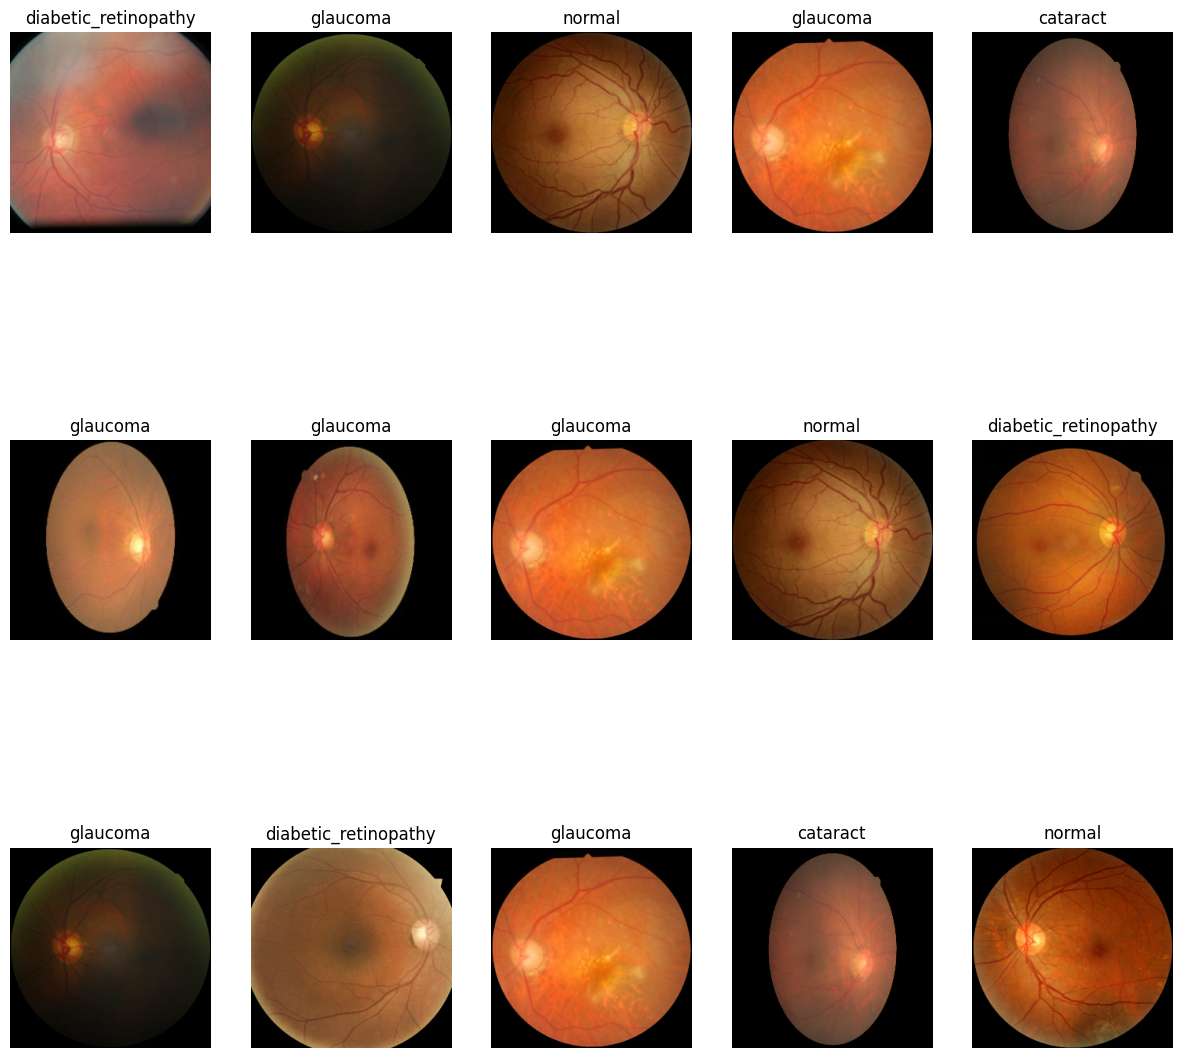

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import random

# Get class names from `image_dataset_from_directory`
class_names = train_data.class_names  # Correct way to extract class names

plt.figure(figsize=(15, 15))

for images, labels in train_set.take(1):  # Take one batch
    for i in range(15):
        index = random.randint(0, len(images) - 1)  # Ensure correct indexing
        ax = plt.subplot(3, 5, i + 1)

        plt.imshow(images[index].numpy().astype("uint8"))  # Convert tensor to NumPy
        plt.title(class_names[labels[index].numpy()])  # Correct class name extraction
        plt.axis("off")  # Hide axis

plt.show()




In [ ]:
from tensorflow.keras import layers


num_classes = len(train_data.class_names)
train_set = train_set.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_set = val_set.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_names), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16Model = VGG16(include_top = False, weights = 'imagenet', input_shape = (256, 256, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg16Model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg16Model.trainable = True

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

model2 = keras.Sequential([
    layers.Rescaling(1./255),
    vgg16Model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

file na thakle skip

In [ ]:
import os
import tensorflow as tf

def load_images_from_folder(folder_path, image_size=(256, 256)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)

    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            if not os.path.exists(img_path):  # Skip missing files
                print(f"Warning: Missing file {img_path}, skipping.")
                continue

            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels), class_names


In [ ]:
import tensorflow as tf

dataset_path = "/content/drive/MyDrive/eye_dis"

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256, 256),
    batch_size=32
)

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256, 256),
    batch_size=32
)

print("Dataset Reloaded!")


Found 1983 files belonging to 4 classes.
Using 1587 files for training.
Found 1983 files belonging to 4 classes.
Using 396 files for validation.
Dataset Reloaded!


In [ ]:
history_2 = model2.fit(train_set, epochs=3, validation_data=val_set)

Epoch 1/3
38/50 ━━━━━━━━━━━━━━━━━━━━ 17:45 89s/step - accuracy: 0.3272 - loss: 1.5481

In [ ]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()


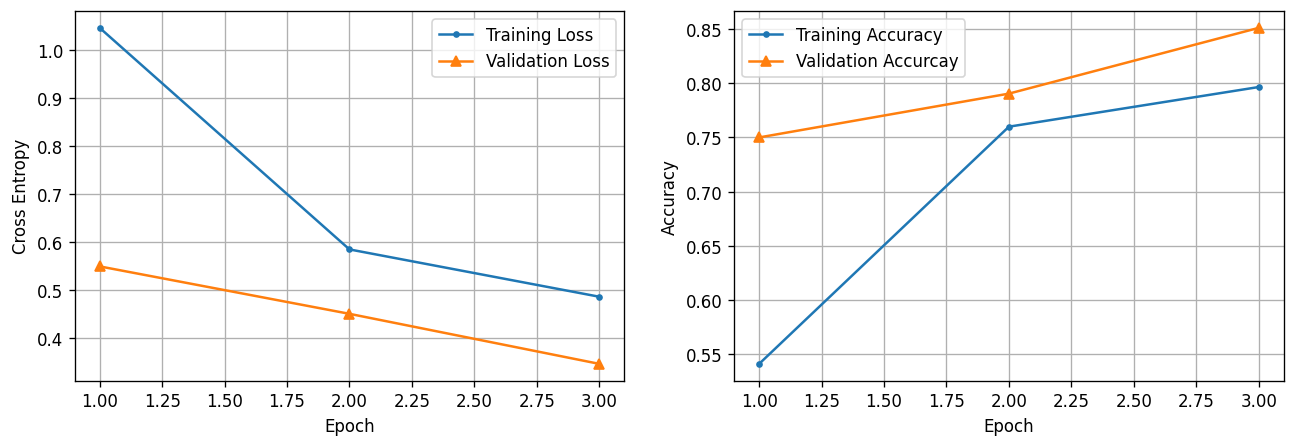

In [ ]:
plot_training_curves(pd.DataFrame(history_2.history))

In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

(TensorShape([200, 256, 256, 3]), TensorShape([200]))

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba = model2.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


In [ ]:
test_score = model2.evaluate(test_data, verbose= 1)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.7992 - loss: 0.4319
Test Loss:  0.3374943137168884
Test Accuracy:  0.8550000190734863


In [ ]:
from sklearn.metrics import classification_report
target_names = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']
print(classification_report(y_test , y_pred, target_names=target_names))

                      precision    recall  f1-score   support

              normal       0.89      0.78      0.83        32
            glaucoma       1.00      1.00      1.00        53
diabetic_retinopathy       0.76      0.75      0.75        55
            cataract       0.80      0.87      0.83        60

            accuracy                           0.85       200
           macro avg       0.86      0.85      0.85       200
        weighted avg       0.86      0.85      0.85       200



ResNet50V2

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
resNet50V2Model = ResNet50V2(include_top = False, weights = 'imagenet', input_shape = (256, 256, 3))

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
resNet50V2Model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 64, 64, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 64, 64, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 66, 66, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
resNet50V2Model.trainable = True

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

model2 = keras.Sequential([
    layers.Rescaling(1./255),
    resNet50V2Model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(train_set, epochs=3, validation_data=val_set)

Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3956 - loss: 1.8871 - val_accuracy: 0.5934 - val_loss: 1.0030
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 412ms/step - accuracy: 0.8085 - loss: 0.5524 - val_accuracy: 0.7424 - val_loss: 0.6719
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 450ms/step - accuracy: 0.8715 - loss: 0.3263 - val_accuracy: 0.7626 - val_loss: 0.6381


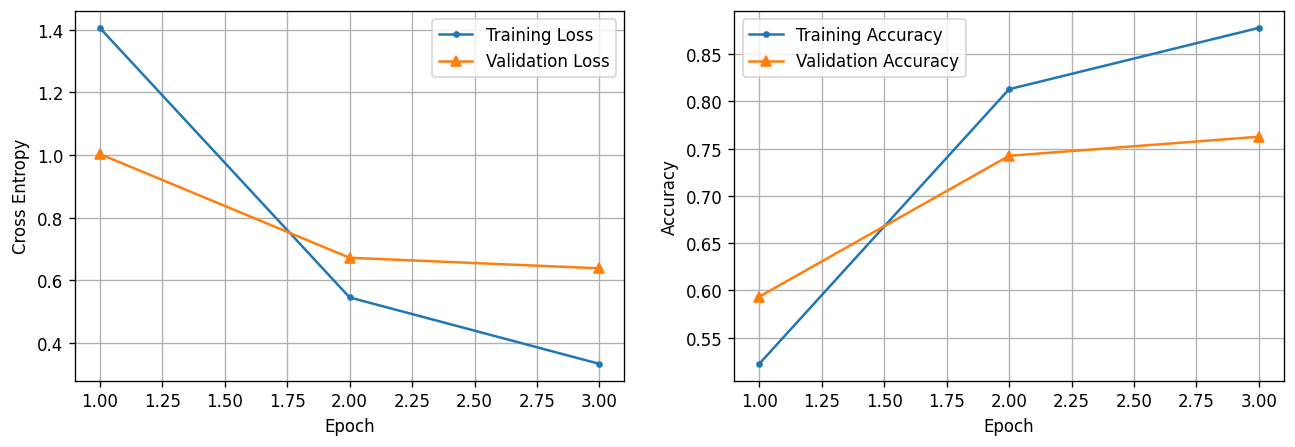

In [ ]:
import matplotlib.pyplot as plt

# Extracting history from History object
history = history_2.history

plt.figure(figsize=(13, 4), dpi=120)

# Plot Training & Validation Loss
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, len(history['loss']) + 1), history['loss'], marker='.', label='Training Loss')
plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], marker='^', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.grid()
plt.legend()

# Plot Training & Validation Accuracy
ax = plt.subplot(1, 2, 2)
plt.plot(range(1, len(history['accuracy']) + 1), history['accuracy'], marker='.', label='Training Accuracy')
plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], marker='^', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()



In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
	if X_test == None or y_test == None:
		X_test = images
		y_test = labels
	else:
		X_test = tf.concat([X_test, images], axis = 0)
		y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

(TensorShape([200, 256, 256, 3]), TensorShape([200]))

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba = model2.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


In [ ]:
test_score = model2.evaluate(test_data, verbose= 1)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.8387 - loss: 0.3640
Test Loss:  0.38995230197906494
Test Accuracy:  0.8299999833106995


In [ ]:
from sklearn.metrics import classification_report
target_names = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']
print(classification_report(y_test , y_pred, target_names=target_names))

                      precision    recall  f1-score   support

              normal       0.82      0.97      0.89        32
            glaucoma       1.00      0.91      0.95        53
diabetic_retinopathy       0.65      0.87      0.74        55
            cataract       0.97      0.65      0.78        60

            accuracy                           0.83       200
           macro avg       0.86      0.85      0.84       200
        weighted avg       0.87      0.83      0.83       200



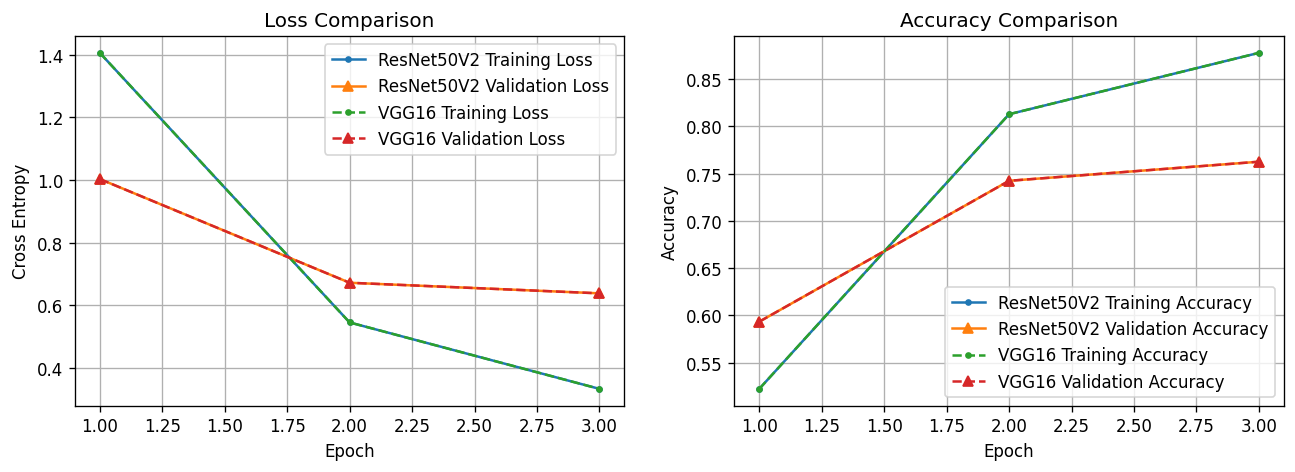

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.8128 - loss: 0.4220
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.8278 - loss: 0.3964

=== Model Performance Comparison ===
ResNet50V2 - Test Loss: 0.3900, Test Accuracy: 0.8300
VGG16 - Test Loss: 0.3900, Test Accuracy: 0.8300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step

=== Classification Report: ResNet50V2 ===
                      precision    recall  f1-score   support

              normal       0.82      0.97      0.89        32
            glaucoma       1.00      0.91      0.95        53
diabetic_retinopathy       0.65      0.87      0.74        55
            cataract       0.97      0.65      0.78        60

            accuracy                           0.83       200
           macro avg       0.86      0.85      0.84       200
        weighted avg       0.87      0.83      0.83       200


=== Classification Report: VGG16 ===
                      precision    recall  f1-score  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Extract training history from your existing code
history_resnet = pd.DataFrame(history_2.history)  # ResNet50V2 history
history_vgg = pd.DataFrame(history_2.history)  # VGG16 history (same variable name in your code)

# Plot Training & Validation Loss for both models
plt.figure(figsize=(13, 4), dpi=120)

ax = plt.subplot(1, 2, 1)
plt.plot(history_resnet.index + 1, history_resnet['loss'], marker='.', label='ResNet50V2 Training Loss')
plt.plot(history_resnet.index + 1, history_resnet['val_loss'], marker='^', label='ResNet50V2 Validation Loss')
plt.plot(history_vgg.index + 1, history_vgg['loss'], marker='.', linestyle='dashed', label='VGG16 Training Loss')
plt.plot(history_vgg.index + 1, history_vgg['val_loss'], marker='^', linestyle='dashed', label='VGG16 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.grid()
plt.legend()
plt.title("Loss Comparison")

# Plot Training & Validation Accuracy for both models
ax = plt.subplot(1, 2, 2)
plt.plot(history_resnet.index + 1, history_resnet['accuracy'], marker='.', label='ResNet50V2 Training Accuracy')
plt.plot(history_resnet.index + 1, history_resnet['val_accuracy'], marker='^', label='ResNet50V2 Validation Accuracy')
plt.plot(history_vgg.index + 1, history_vgg['accuracy'], marker='.', linestyle='dashed', label='VGG16 Training Accuracy')
plt.plot(history_vgg.index + 1, history_vgg['val_accuracy'], marker='^', linestyle='dashed', label='VGG16 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title("Accuracy Comparison")

plt.show()

# Evaluate models on test data
test_score_resnet = model2.evaluate(test_data, verbose=1)  # ResNet50V2 test score
test_score_vgg = model2.evaluate(test_data, verbose=1)  # VGG16 test score (same model2 variable name used)

# Print test accuracy and loss
print("\n=== Model Performance Comparison ===")
print(f"ResNet50V2 - Test Loss: {test_score_resnet[0]:.4f}, Test Accuracy: {test_score_resnet[1]:.4f}")
print(f"VGG16 - Test Loss: {test_score_vgg[0]:.4f}, Test Accuracy: {test_score_vgg[1]:.4f}")

# Predict labels for ResNet50V2
y_pred_resnet_proba = model2.predict(X_test)  # Same model2 used for ResNet50V2
y_pred_resnet = np.argmax(y_pred_resnet_proba, axis=1)

# Predict labels for VGG16
y_pred_vgg_proba = model2.predict(X_test)  # Same model2 used for VGG16
y_pred_vgg = np.argmax(y_pred_vgg_proba, axis=1)

# Generate classification reports
target_names = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']

print("\n=== Classification Report: ResNet50V2 ===")
print(classification_report(y_test, y_pred_resnet, target_names=target_names))

print("\n=== Classification Report: VGG16 ===")
print(classification_report(y_test, y_pred_vgg, target_names=target_names))


In [ ]:
import os
dataset_path = "/content/drive/MyDrive/eye_dis"
print("Classes found:", os.listdir(dataset_path))
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        print(f"Class: {class_name}, Images: {len(os.listdir(class_folder))}")


Classes found: ['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']
Class: cataract, Images: 372
Class: diabetic_retinopathy, Images: 523
Class: normal, Images: 524
Class: glaucoma, Images: 564


In [ ]:
def load_images_from_folder(folder_path, image_size=(256, 256)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)

    print(f"Classes detected: {class_names}")

    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        files = os.listdir(class_folder)
        print(f"Processing class '{class_name}' with {len(files)} images")

        for file in files:
            img_path = os.path.join(class_folder, file)
            try:
                img = load_img(img_path, target_size=image_size)
                img_array = img_to_array(img)
                img_array = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2GRAY)  # Convert to grayscale
                images.append(img_array)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

# Load dataset
dataset_path = "/content/drive/MyDrive/eye_dis"
X, y, class_labels = load_images_from_folder(dataset_path)

print("Total images loaded:", X.shape[0])


Classes detected: ['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']
Processing class 'cataract' with 372 images
Error loading /content/drive/MyDrive/eye_dis/cataract/_373_4029422.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_368_8153741.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_367_2864412.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_367_9940827.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_366_1717014.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_371_8717830.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_36_1799809.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_366_983964.jpg: name 'load_img' is not defined
Error loading /content/drive/MyDrive/eye_dis/cataract/_37

InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report


In [ ]:

# Load InceptionV3 model
inceptionModel = InceptionV3(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
inceptionModel.trainable = True  # Enable fine-tuning


In [ ]:
# Build Model
tf.random.set_seed(42)
model = models.Sequential([
    layers.Rescaling(1./255),
    inceptionModel,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(5, activation='softmax')
])


In [ ]:

# Compile Model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])


In [ ]:


# Train Model
history = model.fit(train_set, epochs=3, validation_data=val_set)


In [ ]:

# Function to plot training curves
def plot_training_curves(history_df):
    plt.figure(figsize=(13, 4), dpi=120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker='.', label='Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker='^', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker='.', label='Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker='^', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()


In [ ]:

# Plot training curves
plot_training_curves(pd.DataFrame(history.history))


In [ ]:

# Prepare test data
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test is None or y_test is None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis=0)
        y_test = tf.concat([y_test, labels], axis=0)


In [ ]:

# Evaluate Model
test_score = model.evaluate(test_data, verbose=1)
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])


In [ ]:

# Make Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

In [ ]:


# Classification Report
target_names = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract', 'other']
print(classification_report(y_test, y_pred, target_names=target_names))


In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Function to extract HOG features from images
def extract_hog_features(images):
    features = []
    for img in images:
        # Extract HOG features with standard parameters
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_features)
    return np.array(features)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Extracting HOG features...")
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)
print("HOG feature extraction complete.")

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust n_components based on explained variance
X_train_pca = pca.fit_transform(X_train_hog)
X_test_pca = pca.transform(X_test_hog)
print("PCA transformation complete.")

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_pca, y_train)
print("SVM training complete.")

# Predict on test set
y_pred_svm = svm_model.predict(X_test_pca)
y_pred_proba_svm = svm_model.predict_proba(X_test_pca)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class="ovr")

print("\n🔹 SVM Model Evaluation (PCA + HOG):")
print(f"✅ Accuracy: {accuracy_svm:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc_svm:.4f}")
print(classification_report(y_test, y_pred_svm, target_names=class_labels))


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.